In [ ]:
import pandas as pd

X_unfiltered = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')


In [ ]:
# Check for missing values
missing = X_unfiltered.isnull().sum()
missing = missing[missing > 0]
print(missing)

#no missing values

Series([], dtype: int64)
99


In [ ]:
# optional -> Used if needed for model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unfiltered)


[[ 0.64798207 -0.38792964  0.11926028 ... -0.03352287 -0.15041259
   0.52931407]
 [ 0.36008435 -1.53576308  1.64226976 ...  0.50465759 -0.70091803
   1.32636971]
 [ 0.06267955 -0.60228539  1.59304521 ... -0.49403509 -0.04911634
   0.08865334]
 ...
 [ 0.80554141  0.15697183 -0.8340023  ...  0.76742256  0.09599599
  -0.40698726]
 [-0.36637906  1.00468341 -2.115138   ...  0.44137467  1.64060986
  -0.19399778]
 [-1.29015901  0.52719652 -0.37224237 ... -0.8117321   0.55706992
   0.12177256]]


In [10]:
# check for class imbalance
class_counts = y['label'].value_counts().sort_index()
print("Class counts:\n", class_counts)

Class counts:
 label
0       18
1        7
2        7
3       65
4      238
5     4479
6      553
7      103
8      516
9       25
10    1081
11      78
12     457
13      62
14     264
15      26
16       6
17     354
18      60
19     177
20     153
21     269
22       7
23      41
24     385
25     184
26     278
27     107
Name: count, dtype: int64


In [11]:
class_percentages = y['label'].value_counts(normalize=True).sort_index() * 100
print("Class percentages:\n", class_percentages)

Class percentages:
 label
0      0.18
1      0.07
2      0.07
3      0.65
4      2.38
5     44.79
6      5.53
7      1.03
8      5.16
9      0.25
10    10.81
11     0.78
12     4.57
13     0.62
14     2.64
15     0.26
16     0.06
17     3.54
18     0.60
19     1.77
20     1.53
21     2.69
22     0.07
23     0.41
24     3.85
25     1.84
26     2.78
27     1.07
Name: proportion, dtype: float64


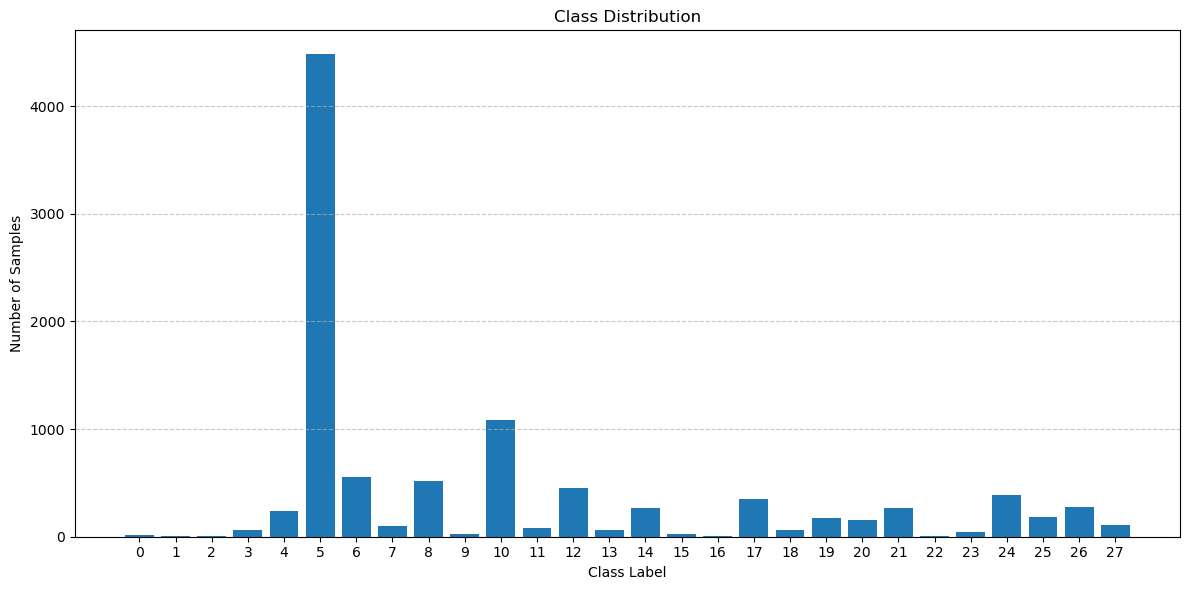

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(class_counts.index) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


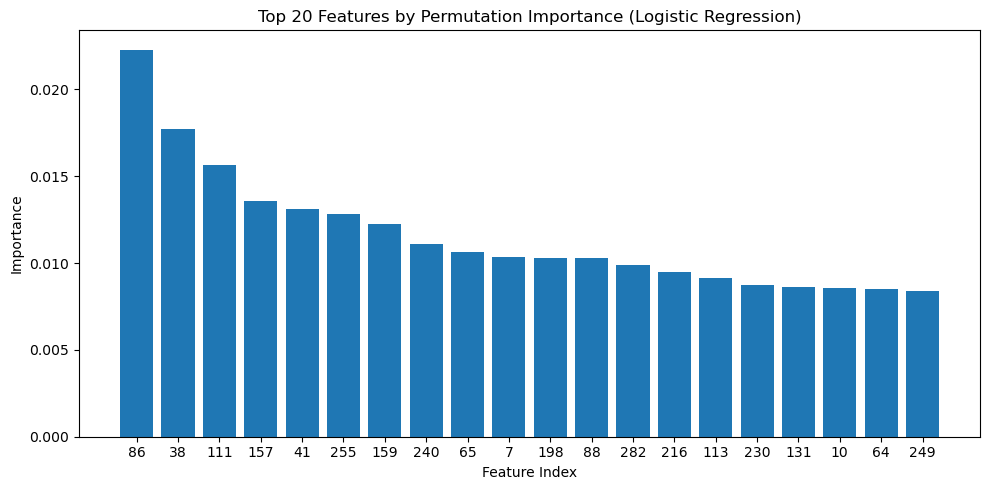

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

logreg = LogisticRegression(multi_class='multinomials', solver='lbfgs', class_weight='balanced', max_iter=1000, penalty='l2')
logreg.fit(X_train, y_train)

result = permutation_importance(logreg, X_val, y_val, n_repeats=10, scoring='f1_weighted', random_state=42)

sorted_idx = result.importances_mean.argsort()[::-1][:20]
plt.figure(figsize=(10, 5))
plt.bar(range(20), result.importances_mean[sorted_idx])
plt.xticks(range(20), sorted_idx)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Top 20 Features by Permutation Importance (Logistic Regression)")
plt.tight_layout()
plt.show()
